## Movie Recommendation System Using K-Means Clustering
### By Arsalan Shoaib Patel and Akash Chandrasekar

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, mean_absolute_error , r2_score


### Exploring the data

In [75]:

data = pd.read_csv("u.data", sep='\t', header=None, names=['user id', 'item id', 'rating', 'timestamp'])

# **This code section is taken from https://www.kaggle.com/code/yoghurtpatil/movielens-100k-data-analysis** 
#Load the Movies data
item = pd.read_csv('u.item', sep="|", encoding='latin-1', header=None)
item.columns = ['movie id', 'movie title' ,'release date','video release date', 'IMDb URL', 'unknown', 'Action', 
                'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 
                'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']


user = pd.read_csv('u.user', sep="|", encoding='latin-1', header=None)
user.columns = ['user id', 'age', 'gender', 'occupation', 'zip code']


genre = pd.read_csv('u.genre', sep="|", encoding='latin-1', header=None)
genre.drop(genre.columns[1], axis=1, inplace=True)
genre.columns = ['Genres']
genre_list = list(genre['Genres'])
display("User data:",user.head(),"Movie data:",item.head(),"Rating data",data.head(),genre_list)

'User data:'

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


'Movie data:'

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


'Rating data'

,user id,item id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


['unknown',
 'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [76]:
# Joining u_data with item on item_id and movie_id
merged_data = pd.merge(data, item, left_on='item id', right_on='movie id', how='left')

# Joining the merged data with user on user_id
final_data = pd.merge(merged_data, user, on='user id', how='left')

display(final_data.head())
final_data.to_csv("final_data.csv")

,user id,item id,rating,timestamp,movie id,movie title,release date,video release date,IMDb URL,unknown,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,age,gender,occupation,zip code
0,196,242,3,881250949,242,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,...,0,0,0,0,0,0,49,M,writer,55105
1,186,302,3,891717742,302,L.A. Confidential (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?L%2EA%2E+Conf...,0,...,1,0,0,1,0,0,39,F,executive,00000
2,22,377,1,878887116,377,Heavyweights (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Heavyweights%...,0,...,0,0,0,0,0,0,25,M,writer,40206
3,244,51,2,880606923,51,Legends of the Fall (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Legends%20of%...,0,...,0,1,0,0,1,1,28,M,technician,80525
4,166,346,1,886397596,346,Jackie Brown (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?imdb-title-11...,0,...,0,0,0,0,0,0,47,M,educator,55113


In [77]:
print("Dataset Shape:", final_data.shape)
missing_values = final_data.isnull().sum()
if missing_values.any() != 0:
    print("No Missing Values in the dataset\n")
statistical_summary = final_data.describe()
display("Statistical Summary:", statistical_summary)


Dataset Shape: (100000, 32)
No Missing Values in the dataset



'Statistical Summary:'

,user id,item id,rating,timestamp,movie id,video release date,unknown,Action,Adventure,Animation,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,age
count,100000.00000,100000.000000,100000.000000,1.000000e+05,100000.000000,0.0,100000.0000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000,100000.000000,100000.000000,100000.000000
mean,462.48475,425.530130,3.529860,8.835289e+08,425.530130,NaN,0.0001,0.255890,0.137530,0.036050,...,0.017330,0.053170,0.049540,0.052450,0.194610,0.12730,0.21872,0.093980,0.018540,32.969850
std,266.61442,330.798356,1.125674,5.343856e+06,330.798356,NaN,0.0100,0.436362,0.344408,0.186416,...,0.130498,0.224373,0.216994,0.222934,0.395902,0.33331,0.41338,0.291802,0.134894,11.562623
min,1.00000,1.000000,1.000000,8.747247e+08,1.000000,NaN,0.0000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,7.000000
25%,254.00000,175.000000,3.000000,8.794487e+08,175.000000,NaN,0.0000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,24.000000
50%,447.00000,322.000000,4.000000,8.828269e+08,322.000000,NaN,0.0000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,30.000000
75%,682.00000,631.000000,4.000000,8.882600e+08,631.000000,NaN,0.0000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,40.000000
max,943.00000,1682.000000,5.000000,8.932866e+08,1682.000000,NaN,1.0000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,73.000000


### Visualizing the datasets

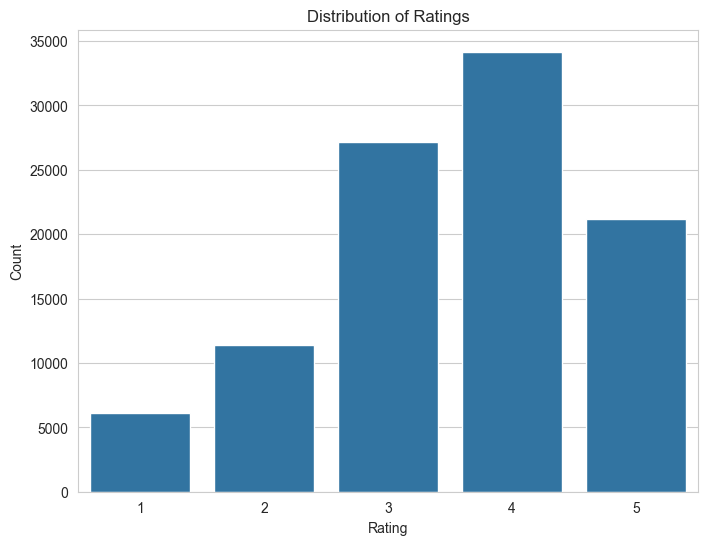

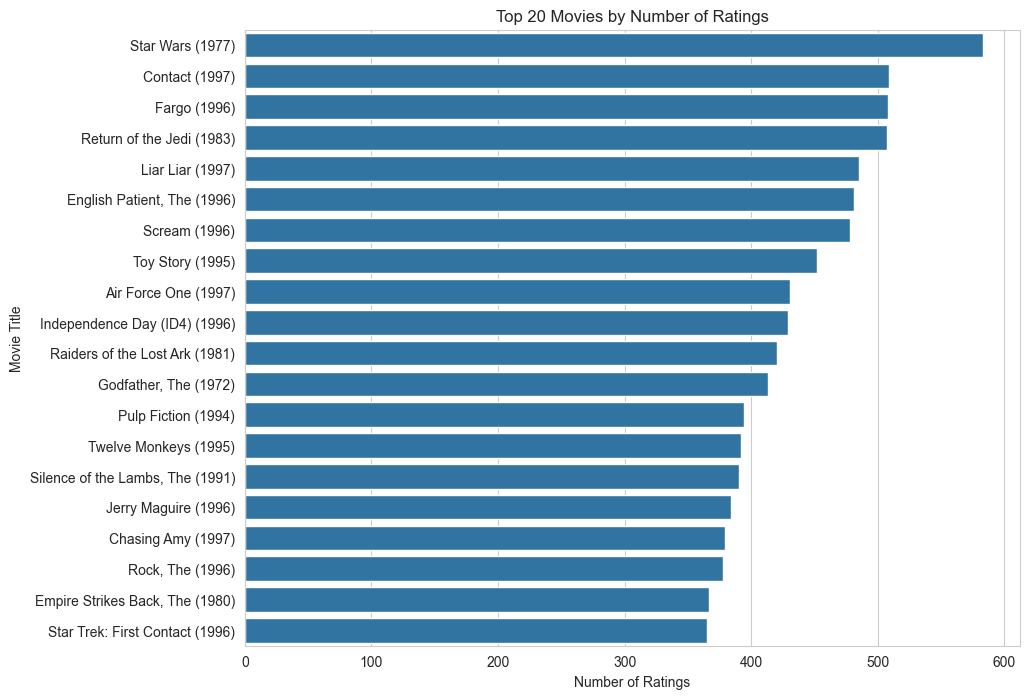

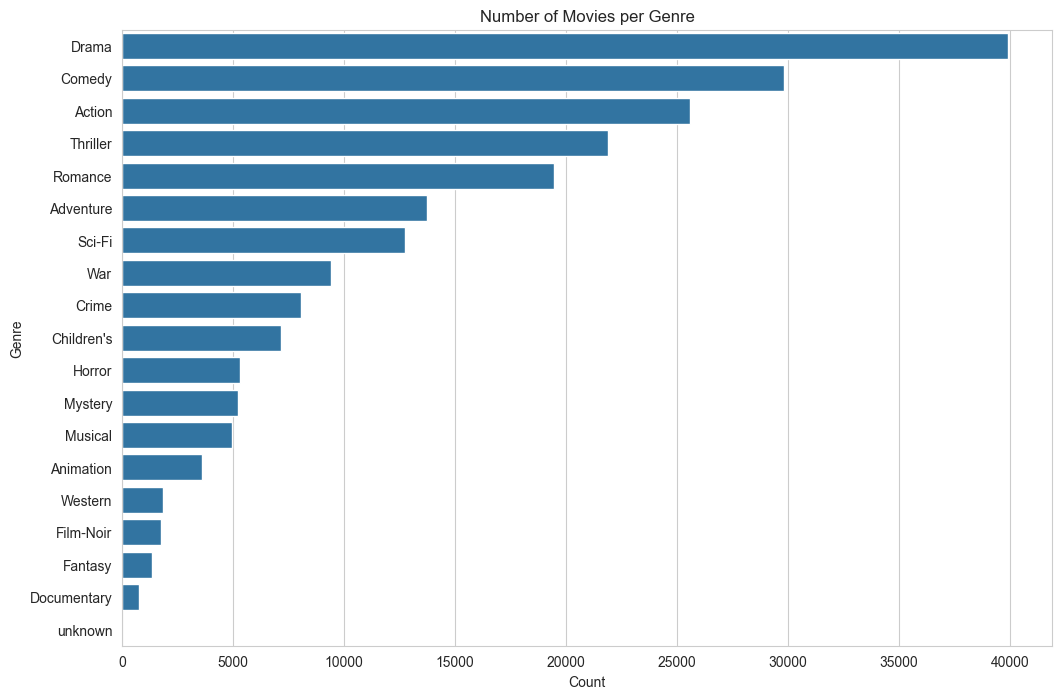

In [78]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=final_data)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

top_movies = final_data['movie title'].value_counts().head(20)
plt.figure(figsize=(10, 8))
sns.barplot(y=top_movies.index, x=top_movies.values)
plt.title('Top 20 Movies by Number of Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('Movie Title')
plt.show()


genre_counts = final_data[genre_list].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.title('Number of Movies per Genre')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


- Various visualizations are created to explore the data.
- A countplot shows the distribution of movie ratings.
- The top 20 movies by the number of ratings are displayed in a barplot.
- The number of movies per genre is also visualized, giving an insight into the genre distribution.


### Normalizing the data and checking for outliers

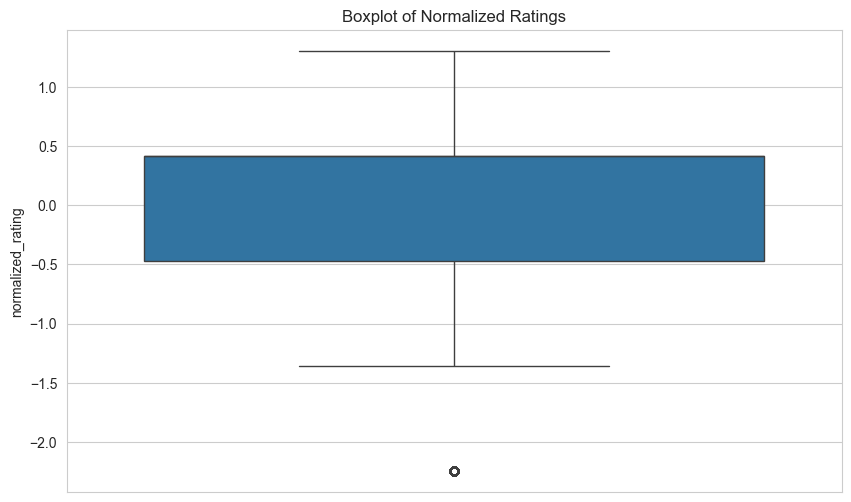

C:\Users\PC\AppData\Local\Temp\ipykernel_9692\1903361238.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  final_data.fillna(method='ffill', inplace=True)  # Handling if missing values


In [79]:
#Normalizing the 'rating' column
scaler = StandardScaler()
final_data['normalized_rating'] = scaler.fit_transform(final_data[['rating']])

# Creating a boxplot to visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(final_data['normalized_rating'])
plt.title('Boxplot of Normalized Ratings')
plt.show()

#Check for missing values
if final_data.isnull().sum().any() == 0:
    print("No missing values in the dataset")
else:
    final_data.fillna(method='ffill', inplace=True)   #Handling if missing values
    pass

- The ratings are normalized using `StandardScaler` to ensure that the model is not biased towards higher values.
- Checks for missing values are performed again post-normalization.


c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  s

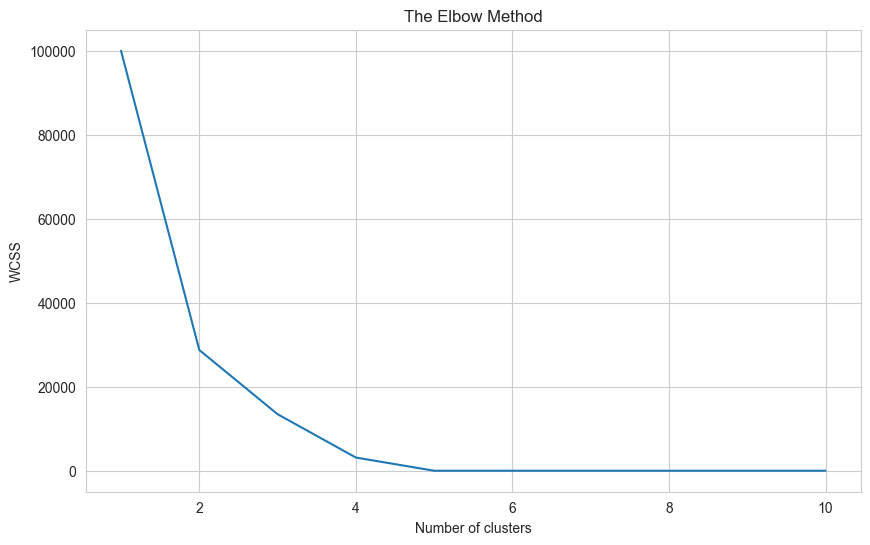

In [80]:
#Using the Elbow Method to find the optimal number of clusters
wcss = []
for i in range(1, 11): 
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=27) #sum of squares within-cluster 
    kmeans.fit(final_data[['normalized_rating']]) 
    wcss.append(kmeans.inertia_) #returns the WCSS value for the fitted clustering.

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

- The Elbow Method is used to determine the optimal number of clusters for K-Means.
- WCSS (Within-Cluster Sum of Squares) is calculated for different numbers of clusters.
- A plot is created to visualize the Elbow Method, helping in deciding the number of clusters to use.


In [81]:
#Assuming the optimal number of clusters is 4 based on our plot and fitting it
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
final_data['cluster'] = kmeans.fit_predict(final_data[['normalized_rating']])

final_data.to_csv("final_data.csv")

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


### Movie recommendation code
- A code is written to recommend movies to a user based on their cluster.
- The system recommends movies from the same cluster as the user's most rated movies.
- A test case is used to demonstrate the functionality of the recommendation system.

In [82]:
# giving movie recommendations to users on movies which they havent seen
user_id = 6 #test
user_ratings = final_data[final_data['user id'] == user_id] #matching the id of the user 
user_cluster = user_ratings['cluster'].mode()[0]  #most common cluster assigned to the movies rated by the user.
cluster_movies = final_data[final_data['cluster'] == user_cluster] 
recommended_movies = cluster_movies[~cluster_movies['movie id'].isin(user_ratings['item id'])] #selects movies that the user has not rated
top_recommendations = recommended_movies.sort_values('normalized_rating', ascending=False).head(10) #giving top 10 
display(top_recommendations['movie title'])


18                           Just Cause (1995)
66097                   Unstrung Heroes (1995)
66134                      True Romance (1993)
66131    Young Poisoner's Handbook, The (1995)
66130                  Last Action Hero (1993)
66127               In the Line of Fire (1993)
66111                       Restoration (1995)
66103                              Jaws (1975)
66100          Sex, Lies, and Videotape (1989)
66083                         GoldenEye (1995)
Name: movie title, dtype: object

- K-Means clustering is applied to the dataset using the optimal number of clusters determined from the previous step.
- Each data point (movie) is assigned to a cluster.


### Predict ratings function on the userid and movie_ids which is a list of random movies

In [83]:

def predict_ratings(user_id, movie_ids):
    user_ratings = final_data[final_data['user id'] == user_id]  #all the ratings for the given user
    if user_ratings.empty: #the overall average rating used if no ratings
        overall_avg = final_data['rating'].mean()
        return [overall_avg] * len(movie_ids)
    user_cluster = user_ratings['cluster'].mode()[0] #most common cluster for the user

    cluster_avg_rating = final_data[final_data['cluster'] == user_cluster]['rating'].mean()  #the average rating for this cluster
    predictions = {}
    for movie_id in movie_ids:
        movie_name = final_data[final_data['item id'] == movie_id]['movie title'].iloc[0] #Constructing the key as "MovieName (MovieID)"
        key = f"{movie_name} ({movie_id})"
        if movie_id in user_ratings['item id'].values: #using the users rating if the movie has been rated by the user
            predictions[key] = user_ratings[user_ratings['item id'] == movie_id]['rating'].iloc[0]
        else:
            predictions[key] = cluster_avg_rating #average is being used

    return predictions


#testing data
test_user_id = 120
movie_ids = final_data[final_data['user id'] == test_user_id]['item id'].head(5).tolist()
actual_ratings = final_data[final_data['user id'] == test_user_id]['rating'].head(5).tolist()
predicted_ratings = predict_ratings(test_user_id, movie_ids)
print("predicted ratings",predicted_ratings,"\nActual ratings:", actual_ratings)



predicted ratings {'Broken Arrow (1996) (546)': 2, 'Time to Kill, A (1996) (282)': 4, 'Birdcage, The (1996) (25)': 5, 'Dead Man Walking (1995) (9)': 4, 'Men in Black (1997) (257)': 2} 
Actual ratings: [2, 4, 5, 4, 2]


### Predicting the mse, msa and R2 value for 100 random values

In [89]:
num_users = 100  # Number of users to evaluate
num_movies = 5   # Number of movies per user to evaluate

np.random.seed(42)  # For reproducibility
random_users = np.random.choice(final_data['user id'].unique(), size=num_users, replace=False) #randomly sampling data
all_actual_ratings = []
all_predicted_ratings = []

#predict_ratings function for each user
for user_id in random_users:
    user_data = final_data[final_data['user id'] == user_id] #selecting random movie for each user
    random_movie_ids = np.random.choice(user_data['item id'].unique(), size=min(num_movies, len(user_data)), replace=False)

    actual_ratings = user_data[user_data['item id'].isin(random_movie_ids)]['rating'].tolist() #actual ratings
    all_actual_ratings.extend(actual_ratings)
    
    predicted_ratings_dict = predict_ratings(user_id, random_movie_ids)  #predict ratings
    predicted_ratings = list(predicted_ratings_dict.values())
    all_predicted_ratings.extend(predicted_ratings)

eval_mse = mean_squared_error(all_actual_ratings, all_predicted_ratings)
eval_mae = mean_absolute_error(all_actual_ratings, all_predicted_ratings)
eval_r2 = r2_score(all_actual_ratings, all_predicted_ratings)

print("Mse:",eval_mse,"\nMae:", eval_mae,"\nr2_score:", eval_r2)

Mse: 1.744 
Mae: 0.884 
r2_score -0.43340423643279613


* The MSE of 1.744 suggests that the predictions are, on average, approximately 1.32 (the square root of MSE) rating points off from the actual ratings.
* The MAE of 0.884 suggests that the predictions are less than one rating point away from the actual value on average, which is not too far off given the rating scale typically used for movies (1-5).
* The negative R-squared value indicates that the model does not follow the trend of the actual data. In some cases, this can happen when the model's predictions are worse than simply predicting the mean rating for all observations.


### **DATA SOURCE CODE: https://www.kaggle.com/code/yoghurtpatil/movielens-100k-data-analysis **
### **DATA SET: https://www.kaggle.com/datasets/prajitdatta/movielens-100k-dataset **